In [84]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("../Pymaceuticals/data/mouse_drug_data.csv")
clinicaltrial_data = pd.read_csv("../Pymaceuticals/data/clinicaltrial_data.csv")
mouse_data.head()
clinicaltrial_data.head()


# Combine the data into a single dataset
combined_data = pd.merge(mouse_data,clinicaltrial_data)

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [85]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
                     
Tumor_Volume = combined_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
Tumor_Volume

# Convert to DataFrame
Tumor_Volume_data_df = pd.DataFrame(Tumor_Volume)
# Preview DataFrame
Tumor_Volume_data_df 

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [86]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Std_error_tumor_volume = combined_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
Std_error_tumor_volume_data_df = pd.DataFrame(Std_error_tumor_volume)

# Preview DataFrame
Std_error_tumor_volume_data_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [87]:
# Minor Data Munging to Re-Format the Data Frames
Re_Std_error_tumor_volume_data_df= Std_error_tumor_volume_data_df.pivot_table(index=["Timepoint"], columns="Drug", 
                                values= "Tumor Volume (mm3)")
# Preview that Reformatting worked
Re_Std_error_tumor_volume_data_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [88]:
new_tumor_volume_data_df= Tumor_Volume_data_df.pivot_table(index=["Timepoint"],columns=["Drug"],
                                values= "Tumor Volume (mm3)")
new_tumor_volume_data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


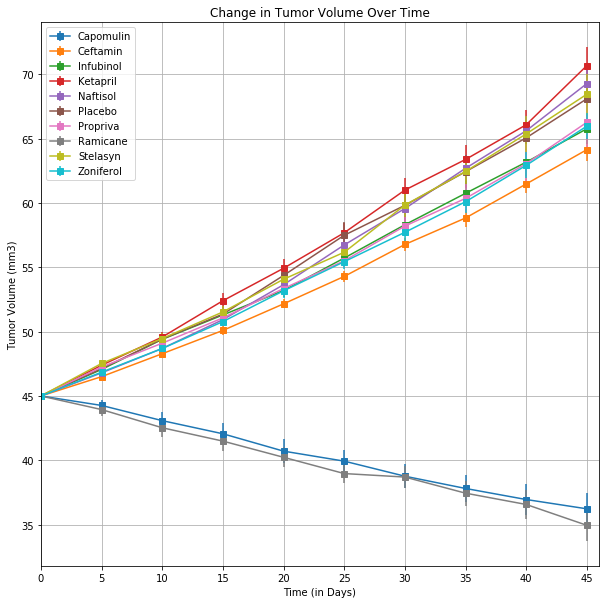

In [89]:
plt.figure(figsize = (10,10))
plt.title("Change in Tumor Volume Over Time")
plt.xlabel("Time (in Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(np.arange(0, new_tumor_volume_data_df.index.max() + 5, 5))
plt.xlim(0, new_tumor_volume_data_df.index.max() + 1)

x = new_tumor_volume_data_df.index

for drug in new_tumor_volume_data_df.columns:
    plt.errorbar(x, new_tumor_volume_data_df[drug], Re_Std_error_tumor_volume_data_df[drug], marker="s")

y = list(new_tumor_volume_data_df.columns)
plt.legend(y)

plt.grid()

plt.savefig("../Pymaceuticals/ChangeInVolume.png")

plt.show()

## Metastatic Response to Treatment

In [90]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_Sites = combined_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
Met_Sites_data = pd.DataFrame(Met_Sites)
# Preview DataFrame
Met_Sites_data.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [91]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Std_error_met_sites = combined_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
Std_error_met_sites
# Convert to DataFrame
Std_error_met_sites_df = pd.DataFrame(Std_error_met_sites)
# Preview DataFrame
Std_error_met_sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [92]:
# Minor Data Munging to Re-Format the Data Frames
Std_error_met_sites_data_df = Std_error_met_sites_df.pivot_table(index=["Timepoint"],columns=["Drug"],
                                values= "Metastatic Sites")
# Preview that Reformatting worked
Std_error_met_sites_data_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [93]:
new_Met_Sites_data = Met_Sites_data.pivot_table(index=["Timepoint"],columns=["Drug"],
                                values = "Metastatic Sites")
new_Met_Sites_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


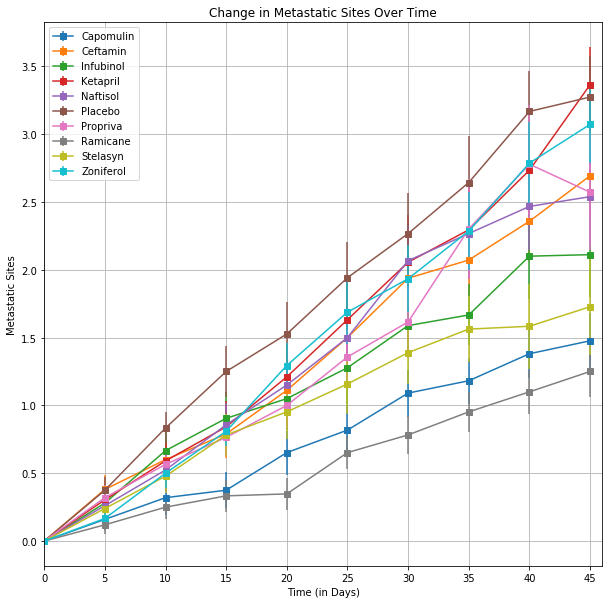

In [94]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10,10))
plt.title("Change in Metastatic Sites Over Time")
plt.xlabel("Time (in Days)")
plt.ylabel("Metastatic Sites")
plt.xticks(np.arange(0, new_Met_Sites_data.index.max() + 5, 5))
plt.xlim(0, new_Met_Sites_data.index.max() + 1)

x = new_Met_Sites_data.index

for drug in new_Met_Sites_data.columns:
    plt.errorbar(x, new_Met_Sites_data[drug], Std_error_met_sites_data_df[drug], marker = 's')

y = list(new_Met_Sites_data.columns)
plt.legend(y)    

plt.grid()

# Save the Figure
plt.savefig("../Pymaceuticals/ChangeInMetSites.png")

# Show the Figure
plt.show()

## Survival Rates

In [95]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Sur_Mice = combined_data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
Sur_Mice
# Convert to DataFrame
Sur_mice_data_df = pd.DataFrame(Sur_Mice)
# Preview DataFrame
Sur_mice_data_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [96]:
# Minor Data Munging to Re-Format the Data Frames
new_sur_mice_data_df = Sur_mice_data_df.pivot_table(index=["Timepoint"],columns=["Drug"],
                                values= "Mouse ID")
# Preview the Data Frame


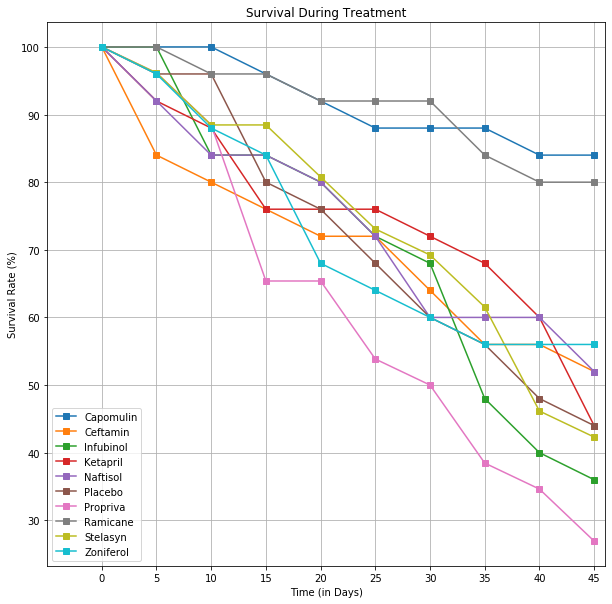

In [97]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (10,10))
plt.title("Survival During Treatment")
plt.xlabel("Time (in Days)")
plt.ylabel("Survival Rate (%)")
plt.xticks(np.arange(0, new_sur_mice_data_df.index.max() + 5, 5))
plt.xlim(-5, new_sur_mice_data_df.index.max() + 1)

x = new_sur_mice_data_df.index
for drug in new_sur_mice_data_df.columns:
    y = (new_sur_mice_data_df[drug]/new_sur_mice_data_df.loc[0, drug]) * 100
    plt.plot(x, y, marker = 's')

y = list(new_sur_mice_data_df.columns)
plt.legend(y)

plt.grid()  

# Save the Figure
plt.savefig("../Pymaceuticals/SurvivalRate.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [98]:
# Calculate the percent changes for each drug
Percent_change = ( new_tumor_volume_data_df.loc[45, :] - new_tumor_volume_data_df.loc[0, :] ) / new_tumor_volume_data_df.loc[0, :] * 100
# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

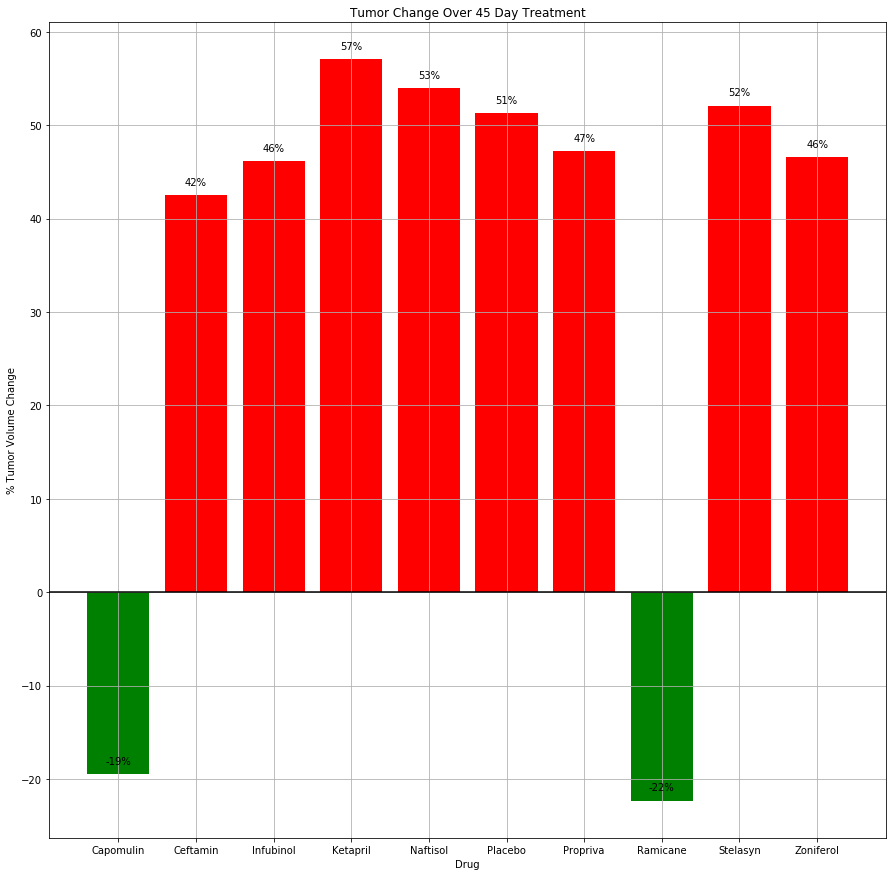

In [99]:
# Store all Relevant Percent Changes into a Tuple
percent_changes_list = list(zip(Percent_change,Percent_change.index))
# Splice the data between passing and failing drugs

# Orient widths. Add labels, tick marks, etc. 
x = Percent_change.index
y = Percent_change.tolist()

fig, ax = plt.subplots(1,1, figsize=(15,15))
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.axhline(y=0, color="black")

bar = plt.bar(x, y, color=["red" if y >= 0 else "green" for y in y])

# Use functions to label the percentages of changes
def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d%%' % int(height),
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(bar, ax)

plt.grid()

# Save the Figure
plt.savefig("../Pymaceuticals/TotalChange.png")
# Show the Figure
plt.show()

In [ ]:
# Observations:
# 1. Only two of the drugs resulted in a decrease of tumor volume: Capomulin and Ramicane. The remaining
# drugs saw in increase in tumor volume.
# 2. At the end of the 45 day treatment, Capomulin had the highest survival rate. Propriva had the lowest survival
# rate.
# 3. The Placebo turned out to really have no effect on the mice. It constantly had the highest metastatic sites,
# up until the very last day, where Ketapril ended with the highest average of metastatic sites. 